In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
models = ["BART", "T5", "GPT-3", "Pegasus"]
criteria = ["ROUGE Score", "Inference Time", "Model Size"]   #rogue should be higher and inference time and model size should be lower

In [4]:
data = np.array([    #sample data
    [0.85, 1.2, 500],  # BART
    [0.88, 1.5, 420],  # T5
    [0.92, 2.0, 340],  # GPT-3
    [0.89, 1.1, 460]   # Pegasus
])

In [5]:
normalized_data = data / np.sqrt((data**2).sum(axis=0))
normalized_data

array([[0.4800345 , 0.40224091, 0.5759696 ],
       [0.49697689, 0.50280114, 0.48381446],
       [0.51956675, 0.67040152, 0.39165933],
       [0.50262436, 0.36872084, 0.52989203]])

In [6]:
weights = np.array([0.5, 0.3, 0.2])  #based on importance
weighted_matrix = normalized_data * weights
weighted_matrix

array([[0.24001725, 0.12067227, 0.11519392],
       [0.24848845, 0.15084034, 0.09676289],
       [0.25978337, 0.20112046, 0.07833187],
       [0.25131218, 0.11061625, 0.10597841]])

In [7]:
ideal_best = np.max(weighted_matrix, axis=0)
ideal_worst = np.min(weighted_matrix, axis=0)
print(ideal_best)
print(ideal_worst)

[0.25978337 0.20112046 0.11519392]
[0.24001725 0.11061625 0.07833187]


In [8]:
distance_best = np.sqrt(((weighted_matrix - ideal_best) ** 2).sum(axis=1))
distance_worst = np.sqrt(((weighted_matrix - ideal_worst) ** 2).sum(axis=1))
print(distance_best)
print(distance_worst)

[0.08284087 0.05472996 0.03686205 0.09136574]
[0.03820909 0.04504932 0.09263752 0.02986481]


In [9]:
topsis_score = distance_worst / (distance_best + distance_worst)
topsis_score

array([0.31564728, 0.45148976, 0.71535001, 0.24634721])

In [10]:
rankings = np.argsort(topsis_score)[::-1]
ranked_models = [(models[i], topsis_score[i]) for i in rankings]
ranked_models

[('GPT-3', 0.7153500072293758),
 ('T5', 0.45148976082772896),
 ('BART', 0.31564727869837333),
 ('Pegasus', 0.24634720758998155)]

In [11]:
results_df = pd.DataFrame({"Model": models, "TOPSIS Score": topsis_score})
results_df.sort_values(by="TOPSIS Score", ascending=False, inplace=True)
results_df

,Model,TOPSIS Score
2,GPT-3,0.715350
1,T5,0.451490
0,BART,0.315647
3,Pegasus,0.246347


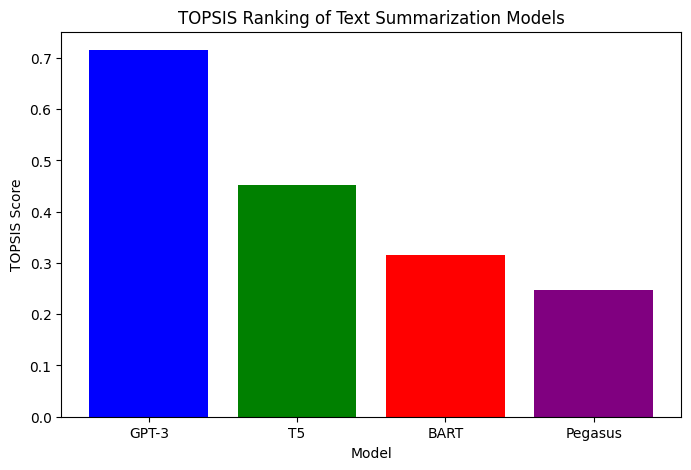

In [12]:
plt.figure(figsize=(8,5))
plt.bar(results_df["Model"], results_df["TOPSIS Score"], color=['blue', 'green', 'red', 'purple'])
plt.xlabel("Model")
plt.ylabel("TOPSIS Score")
plt.title("TOPSIS Ranking of Text Summarization Models")
plt.show()